# 1D Plotting Functionalities for POSYDON PSyGrids

This tutorial shows you how to plot single and binary stellar tracks using the `plot1D` visualization library.
If you haven't done it already, export the environemnt variables.

In [1]:
%env PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
%env PATH_TO_POSYDON_DATA=/Volumes/T7/

env: PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
env: PATH_TO_POSYDON_DATA=/Volumes/T7/


## Example: the HMS-HMS gird

Let's start by loading the grid.

In [2]:
import os
from posydon.config import PATH_TO_POSYDON_DATA
from posydon.grids.psygrid import PSyGrid

path_to_gird = os.path.join(PATH_TO_POSYDON_DATA, 'POSYDON_data/HMS-HMS/1e-01_Zsun.h5')
grid = PSyGrid(path_to_gird)
grid.load()

### Plot one quantity as a function of another

We arbitrary choose the binary 42 to illustrate the plotting funtionalities. You can plot quantities stored in: ``history1``, ``history2``, or ``binary_history``.

In [11]:
import numpy as np
print('binary_history columns:', np.squeeze(grid[42].binary_history.dtype.names))
print('')
print('history1/2 columns:', np.squeeze(grid[42].history1.dtype.names))

binary_history columns: ['model_number' 'age' 'star_1_mass' 'star_2_mass' 'period_days'
 'binary_separation' 'lg_system_mdot_1' 'lg_system_mdot_2'
 'lg_wind_mdot_1' 'lg_wind_mdot_2' 'lg_mstar_dot_1' 'lg_mstar_dot_2'
 'lg_mtransfer_rate' 'xfer_fraction' 'rl_relative_overflow_1'
 'rl_relative_overflow_2' 'trap_radius' 'acc_radius' 't_sync_rad_1'
 't_sync_conv_1' 't_sync_rad_2' 't_sync_conv_2']

history1/2 columns: ['he_core_mass' 'c_core_mass' 'o_core_mass' 'he_core_radius'
 'c_core_radius' 'o_core_radius' 'center_h1' 'center_he4' 'center_c12'
 'center_n14' 'center_o16' 'surface_h1' 'surface_he4' 'surface_c12'
 'surface_n14' 'surface_o16' 'c12_c12' 'center_gamma' 'avg_c_in_c_core'
 'surf_avg_omega' 'surf_avg_omega_div_omega_crit' 'log_LH' 'log_LHe'
 'log_LZ' 'log_Lnuc' 'log_Teff' 'log_L' 'log_R' 'log_center_T'
 'log_center_Rho' 'total_moment_of_inertia' 'spin_parameter'
 'log_total_angular_momentum' 'conv_env_top_mass' 'conv_env_bot_mass'
 'conv_env_top_radius' 'conv_env_bot_radius' 'con

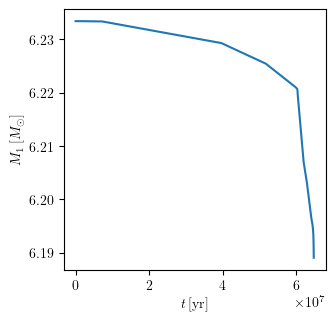

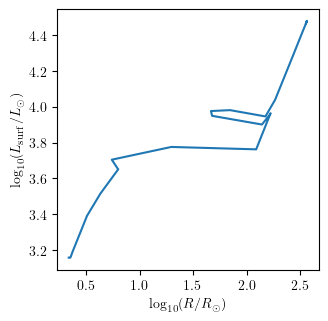

In [13]:
PLOT_PROPERTIES = {
    'show_fig' : True,
    'close_fig' : True,
    #'path_to_file': './dirname/', 
    #'fname': 'filename.png', # specify the file name if you want to safe the figure
}

grid.plot(42, 'age', 'star_1_mass', history='binary_history', **PLOT_PROPERTIES)
grid.plot(42,  'log_R', 'log_L', history='history1', **PLOT_PROPERTIES)

### Plot multiple quantities as a function of one quantity

We can display more properties as a function of another in a subplot like the following examples.

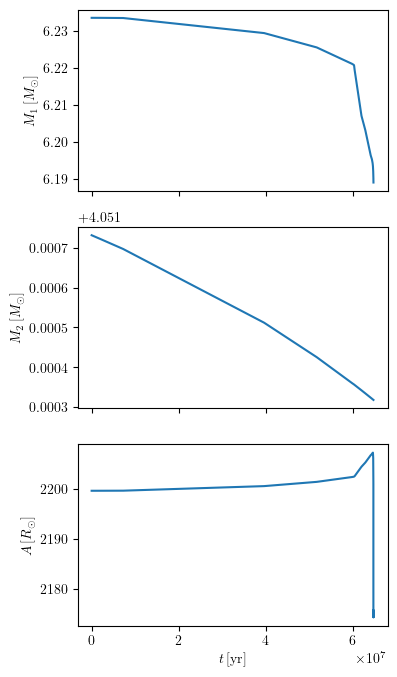

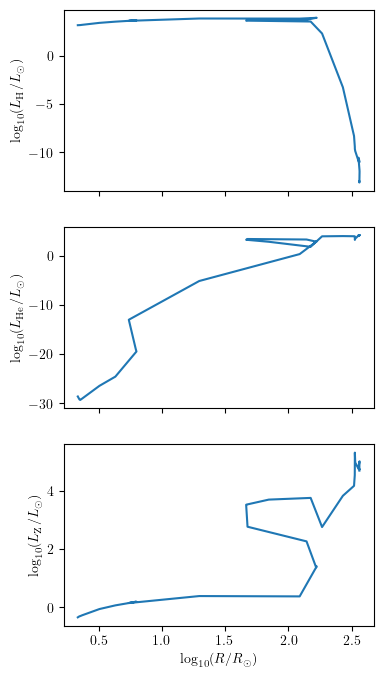

In [16]:
PLOT_PROPERTIES['figsize'] = (4., 8.)

grid.plot(42, 'age', ['star_1_mass', 'star_2_mass', 'binary_separation'], history='binary_history', **PLOT_PROPERTIES)
grid.plot(42, 'log_R', ['log_LH', 'log_LHe','log_LZ'], history='history1', **PLOT_PROPERTIES)

### Plot one or more quantities as a function of another for multiple tracks

If one wants to compare multiple tracks on the same plot, the indices for all binaries can be provided as a list.

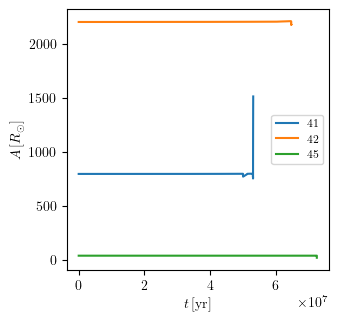

In [24]:
PLOT_PROPERTIES['figsize'] = (3.38, 3.38) # default
PLOT_PROPERTIES['legend1D'] = dict(loc='center right', lines_legend=['41','42','45'])

grid.plot([41,42,45], 'age', 'binary_separation', history='binary_history', **PLOT_PROPERTIES)

### Plot a third quantity as a color map

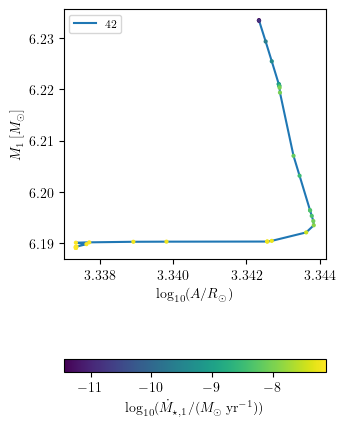

In [28]:
PLOT_PROPERTIES['figsize'] = (3.38, 5)
PLOT_PROPERTIES['log10_x'] = True
PLOT_PROPERTIES['legend1D'] = dict(loc='upper left', lines_legend=['42'])

grid.plot(42, 'binary_separation', 'star_1_mass', 'lg_mstar_dot_1', history='binary_history', **PLOT_PROPERTIES)

### Plotting an Hertzsprung–Russell diagram

One can easily plot the Hertzsprung–Russell (HR) diagram using the ``HR`` method.

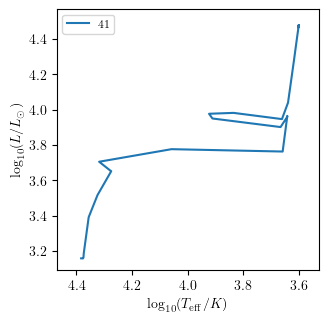

In [32]:
PLOT_PROPERTIES['figsize'] = (3.38, 3.38) # default

grid.HR(42, history='history1', **PLOT_PROPERTIES)

Notice that multiple tracks at once can also be displayed.

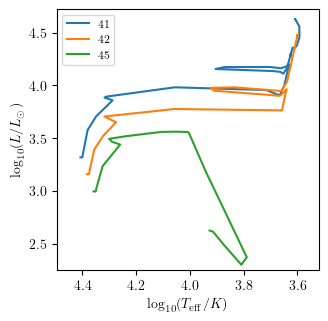

In [33]:
PLOT_PROPERTIES['legend1D'] = dict(loc='upper left', lines_legend=['41','42','45'])
grid.HR([41,42,45], history='history1', **PLOT_PROPERTIES)

## Example: the single HMS gird

### Plotting an Hertzsprung–Russell diagram

The ``HR`` diagram method has also an option to display the stellar states of the tracks. Here we show how to reproduce a HR diagram that looks like Fig. 5 in Fragos et al. (2023).

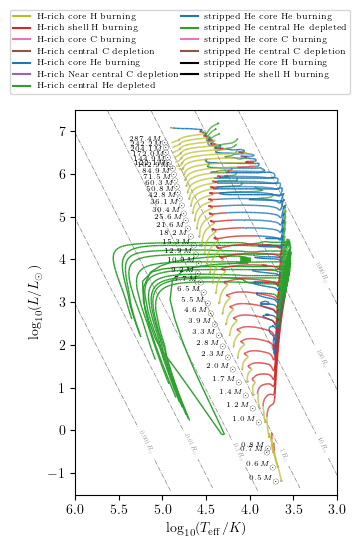

In [37]:
# load single HMS grid
path_to_gird = os.path.join(PATH_TO_POSYDON_DATA, 'POSYDON_data/single_HMS/1e-01_Zsun.h5')
grid = PSyGrid(path_to_gird)
grid.load()

PLOT_PROPERTIES = {
    'figsize' : (3.38, 5),
    'show_fig' : True,
    'close_fig' : True,
    #'path_to_file': './dir/',
    #'fname': 'filename.png', # specify filename to save the figure
    'xmin' : 3.,
    'xmax' : 6.,
    'ymin' : -1.5,
    'ymax' : 7.5,
    'const_R_lines' : True,
    'legend1D' : {
        'loc' : 'upper center',
        'bbox_to_anchor' : (0.4, 1.27),
        'ncol' : 2,
        'prop': {
            'size': 6
        },
        }
}

# chose a subsample of tracks
idx = np.around(np.argsort(grid.initial_values['S1_star_mass']),2)[::8].tolist()

grid.HR(idx, history='history1', states=True, **PLOT_PROPERTIES)

## Example: the single HeMS gird

### Plotting an Hertzsprung–Russell diagram

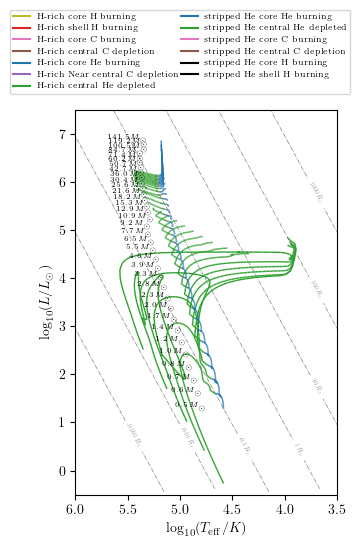

In [40]:
# load single HeMS grid
path_to_gird = os.path.join(PATH_TO_POSYDON_DATA, 'POSYDON_data/single_HeMS/1e-01_Zsun.h5')
grid = PSyGrid(path_to_gird)
grid.load()

PLOT_PROPERTIES['ymin'] = -0.5 
PLOT_PROPERTIES['xmin'] = 3.5

# chose a subsample of tracks
idx = np.around(np.argsort(grid.initial_values['S1_star_mass']),2)[::8].tolist()

grid.HR(idx, history='history1', states=True, **PLOT_PROPERTIES)

Congratulations! You have successfully completed this tutorial. You now master POSYDON 1D visualization tools.